<a href="https://colab.research.google.com/github/GbotemiB/DSN-2023-Hackathon/blob/main/2023_DSN_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
train_path = "https://github.com/GbotemiB/DSN-2023-Hackathon/raw/main/Housing_dataset_train.csv"
test_path = "https://github.com/GbotemiB/DSN-2023-Hackathon/raw/main/Housing_dataset_test.csv"
submission_sample_path = "https://github.com/GbotemiB/DSN-2023-Hackathon/raw/main/Sample_submission.csv"

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission_sample = pd.read_csv(submission_sample_path)

In [4]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [5]:
train.shape

(14000, 7)

## Analysis

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [7]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [8]:
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [12]:
(train.isna().sum() / len(train)) * 100

ID                0.000000
loc              12.950000
title            12.300000
bedroom          12.850000
bathroom         12.892857
parking_space    12.935714
price             0.000000
dtype: float64

In [13]:
train['loc'].value_counts(sort=True)

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: loc, dtype: int64

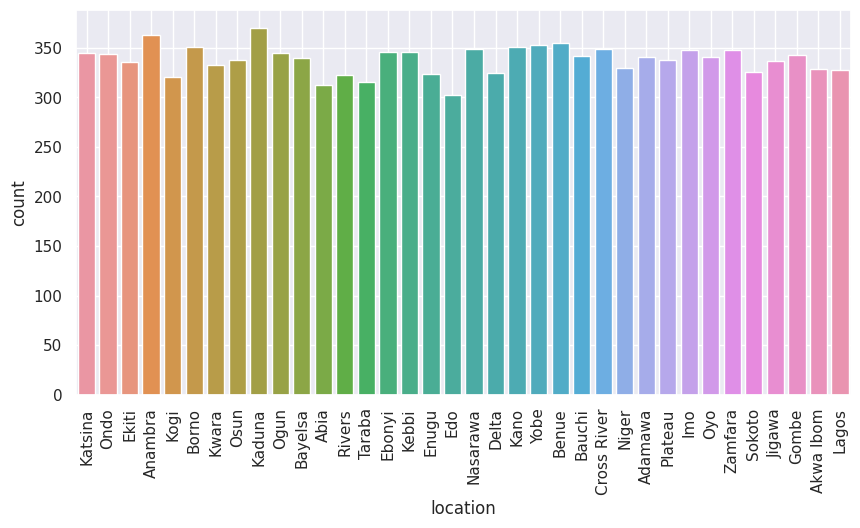

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='loc')
plt.xticks(rotation=90)
plt.xlabel('location')

plt.grid(True)
plt.show()

In [15]:
train['title'].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

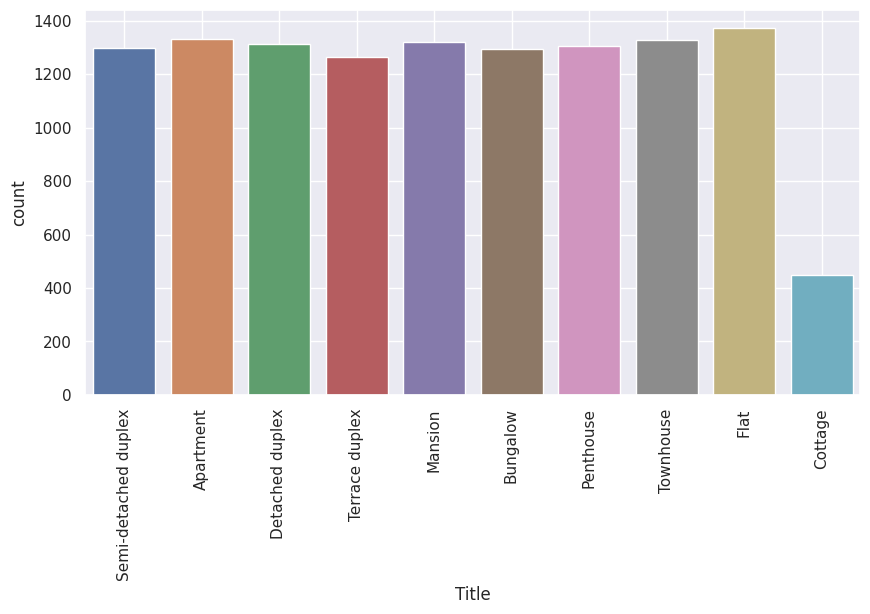

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='title')
plt.xticks(rotation=90)
plt.xlabel('Title')

plt.grid(True)
plt.show()

In [17]:
train['bedroom'].value_counts()

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

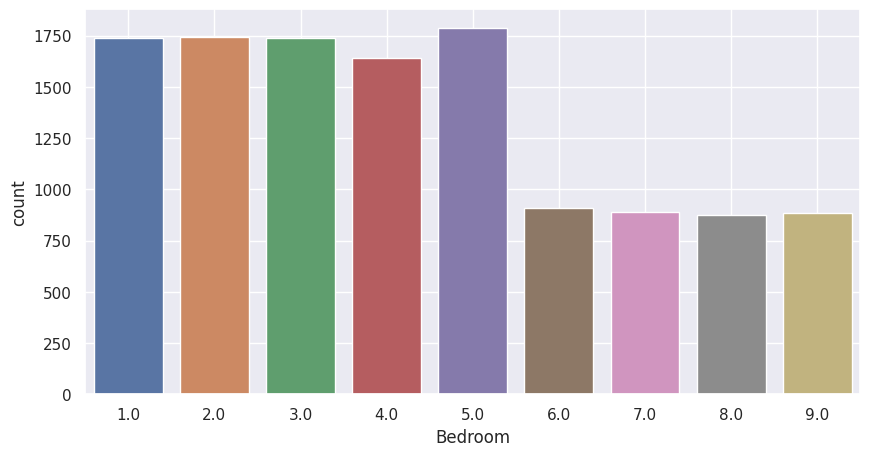

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='bedroom')
plt.xlabel('Bedroom')

plt.grid(True)
plt.show()

In [19]:
train['bathroom'].value_counts()

1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: bathroom, dtype: int64

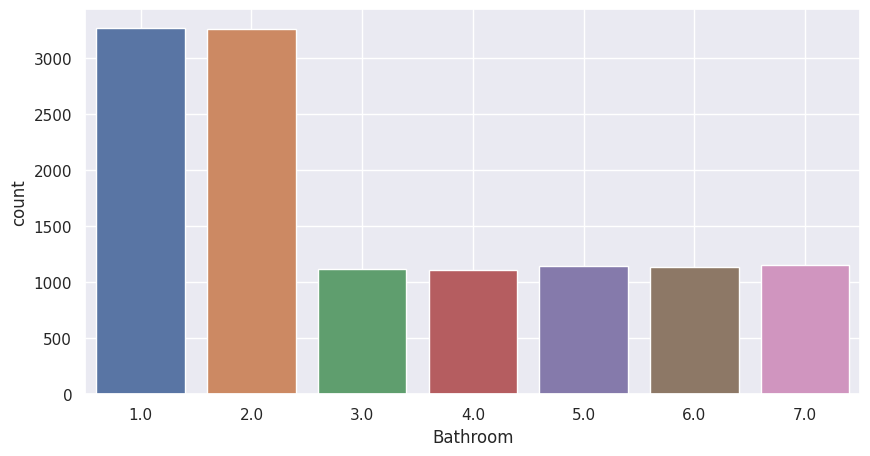

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='bathroom')
plt.xlabel('Bathroom')

plt.grid(True)
plt.show()

In [21]:
train['parking_space'].value_counts()

4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: parking_space, dtype: int64

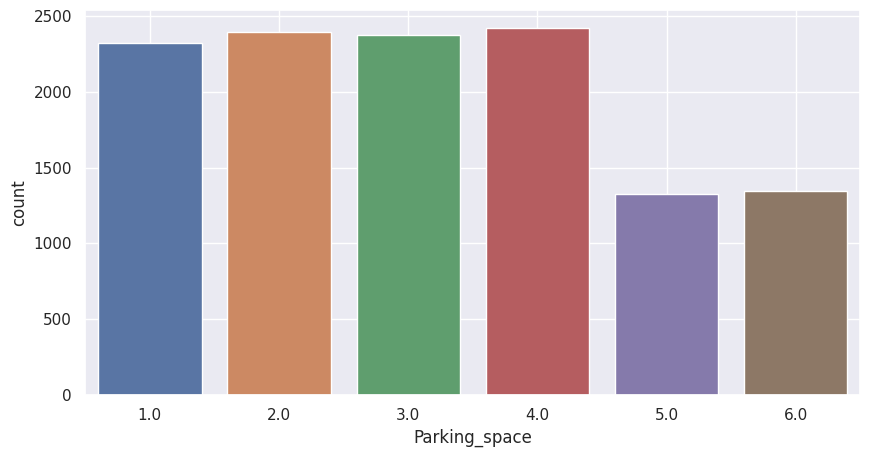

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='parking_space')
plt.xlabel('Parking_space')

plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

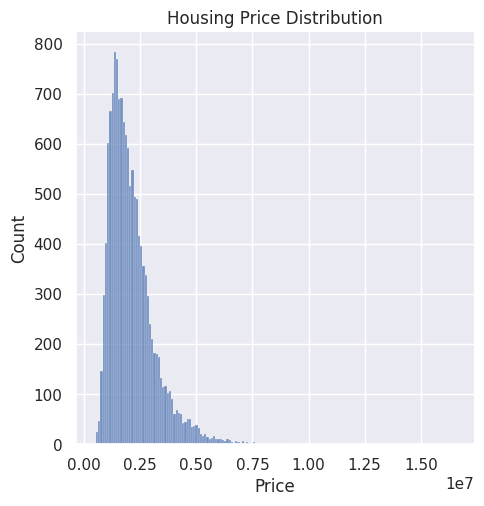

In [23]:
plt.figure(figsize=(10,5))
sns.displot(data=train, x='price')
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

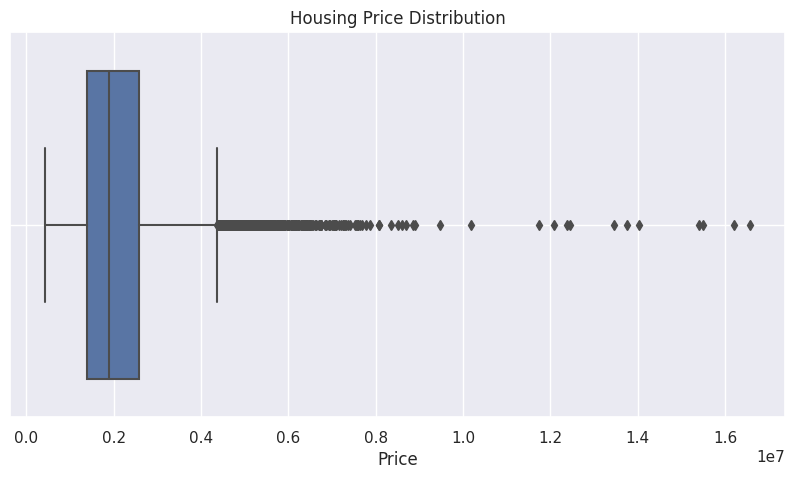

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='price')
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

In [25]:
train_loc_groupby = train.groupby(train['loc']).mean(numeric_only=True)

In [26]:
train_loc_groupby.head()

,ID,bedroom,bathroom,parking_space,price
loc,,,,,
Abia,5055.266026,4.131387,3.137931,3.373134,1.717083e+06
Adamawa,4405.217009,4.269625,3.020408,3.087108,1.905287e+06
Akwa Ibom,4781.866261,4.275261,3.090592,3.142349,2.725454e+06
Anambra,4951.118457,4.078689,3.058065,3.279365,2.337230e+06
Bauchi,4831.602339,4.435714,3.359060,3.130872,1.772961e+06


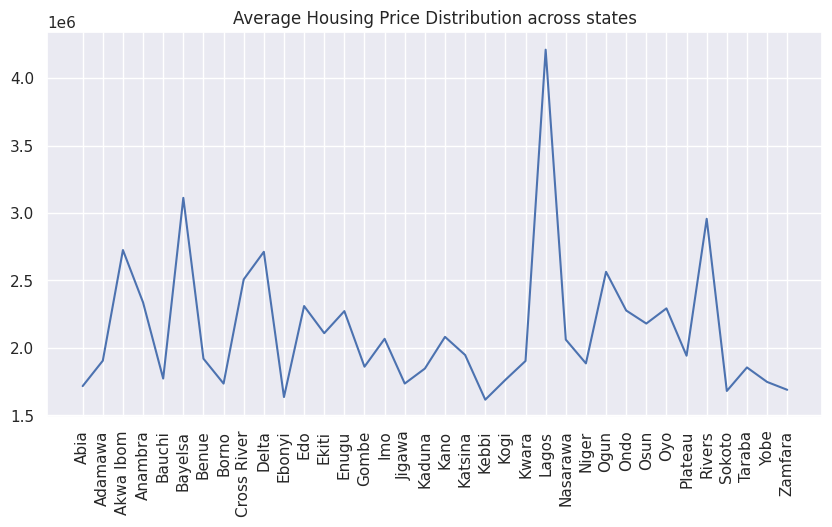

In [27]:
plt.figure(figsize=(10,5))
plt.plot(train_loc_groupby['price'], label='loc')
# plt.xlabel('Location')
plt.title('Average Housing Price Distribution across states')
plt.xticks(rotation=90)

plt.show()

In [28]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

<Figure size 1000x500 with 0 Axes>

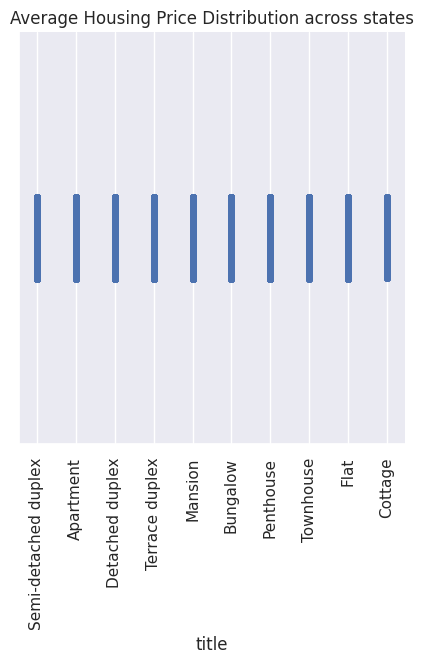

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(data=train, x='title', )
# plt.xlabel('Location')
plt.title('Average Housing Price Distribution across states')
plt.xticks(rotation=90)

plt.show()

## Modelling

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [88]:
loc_mode = train['loc'].mode()[0]
title_mode = train['title'].mode()[0]
bedroom_mean = train['bedroom'].mean().round()
bathroom_mean = train['bathroom'].mean().round()
parking_space_mean = train['parking_space'].mean().round()

In [89]:
filled_train = train.fillna(value={'loc':loc_mode, 'title': title_mode, 'bedroom': bedroom_mean, 'bathroom': bathroom_mean, 'parking_space': parking_space_mean})

In [90]:
filled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            14000 non-null  object 
 2   title          14000 non-null  object 
 3   bedroom        14000 non-null  float64
 4   bathroom       14000 non-null  float64
 5   parking_space  14000 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [91]:
cat_cols = filled_train.select_dtypes(include='object').columns.tolist()
num_cols = filled_train.select_dtypes(exclude='object').columns.tolist()

In [92]:
cat_cols, num_cols

(['loc', 'title'], ['ID', 'bedroom', 'bathroom', 'parking_space', 'price'])

In [100]:
filled_train['loc'] = filled_train['loc'].astype('category').cat.codes

In [101]:
filled_train_encoded = pd.get_dummies(data=filled_train, columns=['title'], drop_first=True)

In [102]:
filled_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14000 non-null  int64  
 1   loc                         14000 non-null  int8   
 2   bedroom                     14000 non-null  float64
 3   bathroom                    14000 non-null  float64
 4   parking_space               14000 non-null  float64
 5   price                       14000 non-null  float64
 6   title_Bungalow              14000 non-null  uint8  
 7   title_Cottage               14000 non-null  uint8  
 8   title_Detached duplex       14000 non-null  uint8  
 9   title_Flat                  14000 non-null  uint8  
 10  title_Mansion               14000 non-null  uint8  
 11  title_Penthouse             14000 non-null  uint8  
 12  title_Semi-detached duplex  14000 non-null  uint8  
 13  title_Terrace duplex        140

In [50]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.5 MB/s eta 0:00:00


In [51]:
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
X = filled_train_encoded.drop(columns=['ID', 'price'], axis=0)
y = filled_train_encoded['price']

RANDOM_STATE = 42

In [58]:
X.shape, y.shape

((14000, 47), (14000,))

In [72]:
oof_pred = []
fold_pred = []

fold = KFold(n_splits=5)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = LinearRegression()
  model.fit(X_train, y_train)
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, model_preds, squared=False)
  print(f'err: {rmse}')
  fold_pred.append(rmse)
  # oof = model.predict(test_set)
  # oof_pred.append(oof)


np.mean(fold_pred)

err: 544679.6064581829
err: 583693.0106481109
err: 564020.4085945351
err: 561024.5679829416
err: 599159.0314782187


570515.3250323979

In [78]:
oof_pred_1 = []
fold_pred_1 = []

fold = KFold(n_splits=5)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
  model.fit(X_train, y_train)
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, model_preds, squared=False)
  print(f'err: {rmse}')
  fold_pred_1.append(rmse)
  # oof = model.predict(test_set)
  # oof_pred.append(oof)


np.mean(fold_pred_1)

err: 566002.9034488251
err: 642773.9967841286
err: 601605.8174022563
err: 645495.6345144074
err: 652666.0542379064


621708.8812775047

In [87]:
oof_pred_2 = []
fold_pred_2 = []

fold = KFold(n_splits=5)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = LGBMRegressor(learning_rate=0.01, n_estimators=1000)
  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='rmse')
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, model_preds, squared=False)
  print(f'err: {rmse}')
  fold_pred_2.append(rmse)
  # oof = model.predict(test_set)
  # oof_pred.append(oof)


np.mean(fold_pred_2)

Streaming output truncated to the last 5000 lines.
[6]	training's rmse: 1.04456e+06	training's l2: 1.09111e+12	valid_1's rmse: 1.0391e+06	valid_1's l2: 1.07973e+12
[7]	training's rmse: 1.03834e+06	training's l2: 1.07814e+12	valid_1's rmse: 1.03257e+06	valid_1's l2: 1.06621e+12
[8]	training's rmse: 1.03221e+06	training's l2: 1.06545e+12	valid_1's rmse: 1.02618e+06	valid_1's l2: 1.05304e+12
[9]	training's rmse: 1.02615e+06	training's l2: 1.05299e+12	valid_1's rmse: 1.01991e+06	valid_1's l2: 1.04022e+12
[10]	training's rmse: 1.02046e+06	training's l2: 1.04134e+12	valid_1's rmse: 1.01417e+06	valid_1's l2: 1.02855e+12
[11]	training's rmse: 1.01456e+06	training's l2: 1.02933e+12	valid_1's rmse: 1.00795e+06	valid_1's l2: 1.01596e+12
[12]	training's rmse: 1.00875e+06	training's l2: 1.01757e+12	valid_1's rmse: 1.00186e+06	valid_1's l2: 1.00372e+12
[13]	training's rmse: 1.00303e+06	training's l2: 1.00607e+12	valid_1's rmse: 995949	valid_1's l2: 9.91914e+11
[14]	training's rmse: 997379	training's

550925.7297560312

In [85]:
oof_pred_3 = []
fold_pred_3 = []

fold = KFold(n_splits=5)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = CatBoostRegressor(learning_rate=0.01, n_estimators=1000)
  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, model_preds, squared=False)
  print(f'err: {rmse}')
  fold_pred_3.append(rmse)
  # oof = model.predict(test_set)
  # oof_pred.append(oof)


np.mean(fold_pred_3)

err: 527088.190282015
err: 587756.4370731788
err: 546471.2319002412
err: 565610.8834893722
err: 595630.0968427663


564511.3679175146

## No cross validation

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = LGBMRegressor(learning_rate=0.01, n_estimators=1000)
model.fit(X_train, y_train)
model_preds = model.predict(X_test)

rmse = mean_squared_error(y_test, model_preds, squared=False)
print(f'err: {rmse}')

err: 600344.3908520027
